<a href="https://colab.research.google.com/github/keith-leung/Celia/blob/master/Minimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Minimax to solve tic-tac-toe
# state[r,c] is the content at position (r,c) of the board: "_", "X", or "O"
# TODO: implement base case (watch out for draws and early wins)
# TODO: compare with XKCD solution, do they match? Why or why not?
import numpy as np

def state_string(state):
    return "\n".join(["".join(row) for row in state])

def score(state):
    for player, value in (("X", 1), ("O", -1)):
        if (state == player).all(axis=0).any(): return value
        if (state == player).all(axis=1).any(): return value
        if (np.diag(state) == player).all(): return value
        if (np.diag(np.rot90(state)) == player).all(): return value
    return 0

def get_player(state):
    return "XO"[
        np.count_nonzero(state == "O") < np.count_nonzero(state == "X")]

def children_of(state):
    symbol = get_player(state)
    children = []
    for r in range(state.shape[0]):
        for c in range(state.shape[1]):
            if state[r,c] == "_":
                child = state.copy()
                child[r,c] = symbol
                children.append(child)
    return list(reversed(children))

def minimax(state):
    # returns chosen child state, utility
    player = get_player(state)
    children = children_of(state)

    # base case (TODO)
    value = score(state)
    if len(children) == 0 or value != 0: return None, value

    # recursive case
    results = list(map(minimax, children))
    _, utilities = zip(*results)
    if player == "X": action = np.argmax(utilities)
    if player == "O": action = np.argmin(utilities)
    return children[action], utilities[action]


if __name__ == "__main__":

    state = np.array([["_"]*3]*3)
    state[0,0] = "X" # optimal, according to https://xkcd.com/832/
    # state[0,1] = "O" # suboptimal
    
    # Each player using minimax each turn to decide the next action and state
    while state is not None:
      print(state_string(state))
      state, u = minimax(state)
      print("utility:", u)


X__
___
___
utility: 0
X__
_O_
___
utility: 0
X__
_O_
__X
utility: 0
X__
_O_
_OX
utility: 0
XX_
_O_
_OX
utility: 0
XXO
_O_
_OX
utility: 0
XXO
_O_
XOX
utility: 0
XXO
OO_
XOX
utility: 0
XXO
OOX
XOX
utility: 0


In [ ]:
a = np.array([[1,2],[0,1]])
print(a)
print(a > 0)
print((a > 0).all(axis=0).any())
print(np.rot90(a))
a.shape

[[1 2]
 [0 1]]
[[ True  True]
 [False  True]]
True
[[2 1]
 [1 0]]


(2, 2)

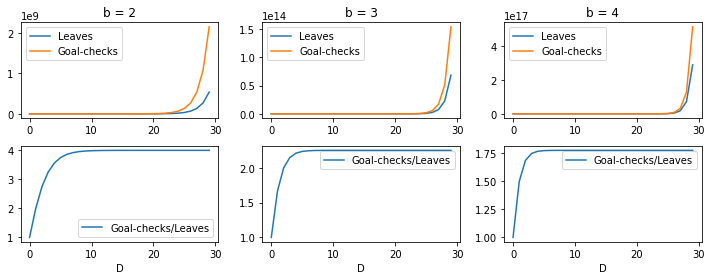

In [ ]:
# IDS asymptotic complexity

import numpy as np
import matplotlib.pyplot as pt

pt.figure(figsize=(10,4))
for b in range(2,5):
    tree = []
    leaf = []
    fracs = []
    for D in range(30):
        d = np.arange(D+1)
        tree.append( ((D+1 - d) * b**d).sum() )
        leaf.append( b**D )
        fracs.append( tree[D] / leaf[D] )
    
    pt.subplot(2,3,b-1)
    pt.title("b = %d" % b)
    pt.plot(leaf, label="Leaves")
    pt.plot(tree, label="Goal-checks")
    pt.legend()
    pt.subplot(2,3,3+b-1)
    pt.plot(np.array(tree) / np.array(leaf), label="Goal-checks/Leaves")
    pt.xlabel("D")
    pt.legend()

pt.tight_layout()
pt.show()


In [ ]:
# TODO:
# Add base case to evaluate a state at maximum depth
# Try deeper max depths

def depth_limited_minimax(state, max_depth, evaluate):
    # returns chosen child state, utility
    player = get_player(state)
    children = children_of(state)
    value = score(state)

    # base cases
    if len(children) == 0 or value != 0: return None, value
    if max_depth == 0: return None, evaluate(state) # TODO

    # recursive case
    results = [
        depth_limited_minimax(child, max_depth-1, evaluate)
        for child in children]

    _, utilities = zip(*results)
    if player == "X": action = np.argmax(utilities)
    if player == "O": action = np.argmin(utilities)
    return children[action], utilities[action]

def simple_evaluate(state):
    # count how many ways it is still possible to win or lose
    count = 0
    for player, value in (("X", 1), ("O", -1)):
        count += ((state == player) | (state == "_")).all(axis=0).sum() * value
        count += ((state == player) | (state == "_")).all(axis=1).sum() * value
        count += ((np.diag(state) == player) | (np.diag(state) == "_")).all() * value
        count += ((np.diag(np.rot90(state)) == player) | (np.diag(np.rot90(state)) == "_")).all() * value
    return count

if __name__ == "__main__":

    state = np.array([["_"]*3]*3)
    #state[0,0] = "X" # optimal, according to https://xkcd.com/832/

    max_depth = 9 # TODO
    
    # Each player using minimax each turn to decide the next action and state
    while True:
      if len(children_of(state)) == 0 or score(state) != 0: break

      print(state_string(state))

      if get_player(state) == "O":
        while True:
          row = int(input("Enter row: "))
          col = int(input("Enter col: "))
          if state[row,col] == "_":
            state[row,col] = "O"
            break
          print("Invalid choice.")
      else:
        state, u = depth_limited_minimax(state, max_depth, simple_evaluate)
        print("evaluation:", u)
    
    print(state_string(state))
    print("Final score: ", score(state))
    input("")

___
___
___
evaluation: 0
___
___
__X


KeyboardInterrupt: ignored